Imports loaded


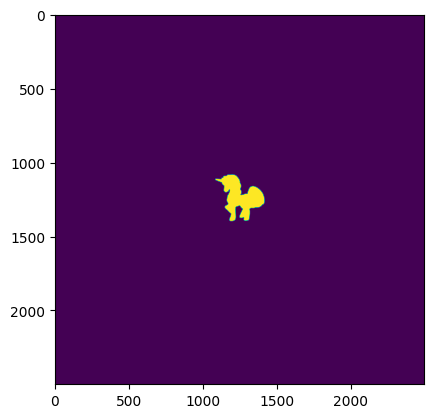

100%|██████████████████████████████████████████████████████████████████████████████████| 84/84 [00:08<00:00,  9.51it/s]


Creating mask...


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 164.72it/s]


Calculating limb darkening coefficients....


100%|████████████████████████████████████████████████████████████████████████████| 1329/1329 [00:00<00:00, 1765.44it/s]


Creating mask...


100%|█████████████████████████████████████████████████████████████████████████████| 1329/1329 [00:10<00:00, 130.21it/s]


In [2]:
# Import necessary dependencies
from pfu_transit.mask_generation import generate_star, add_atmosphere
from pfu_transit.planet_atmosphere_extinction import ExoplanetAtmosphere
from pfu_transit.photometry_simulation import photometric_observation
# Standard imports
import matplotlib.pyplot as plt
import numpy as np
import warnings
import astropy.constants as c
warnings.filterwarnings("ignore")
print("Imports loaded")

# UNICORN TRANSIT PARAMETERS
framew = 2500
frameh = 2500
planet_radius =  0.5*c.R_jup/c.R_sun
max_height = 1
image_scale = 3/framew
wavelength = 0.5
b = 0.4

# Load unicorn mask
unicorn_npz = np.load("assets/unicorn/unicorn_boolean_mask.npz")
unicorn = unicorn_npz["arr_0"]

# Pad unicorn mask to intended size
exoplanet_mask = np.pad(unicorn, ((int((framew - np.shape(unicorn)[0])/2), int((framew - np.shape(unicorn)[0])/2)),\
                   (int((frameh - np.shape(unicorn)[1])/2), int((frameh - np.shape(unicorn)[1])/2))), mode="constant", constant_values=0)

plt.imshow(exoplanet_mask)
plt.show()

# Create ExoplanetAtmosphere class
exoplanet_atmosphere = ExoplanetAtmosphere("assets/opacity_data_earth.npz","assets/density_profile_earth.npz", planet_type="rocky",max_height=max_height)

# Prepare function that generates profile
def atmo_func(radii):
    return exoplanet_atmosphere.extinction_sphere(radii*image_scale, planet_radius, wavelength)

# Generate atmospheric profile and add onto the mask 
exoplanet_mask = add_atmosphere(exoplanet_mask, atmo_func, max_height*planet_radius/image_scale)

# STAR
star_mask = generate_star(wavelength=0.5, stellar_radius = 0.8, stellar_temperature=4800, stellar_oblateness = 0)



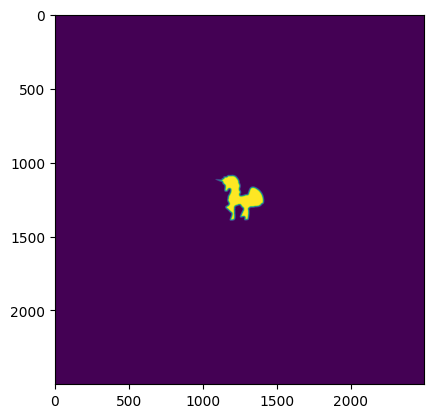

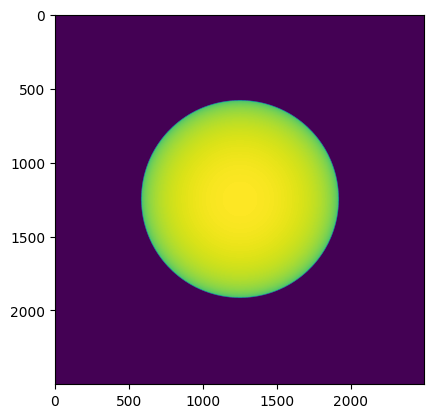

In [3]:
plt.imshow(exoplanet_mask)
plt.show()

plt.imshow(star_mask)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 2169/2169 [00:31<00:00, 68.53it/s]


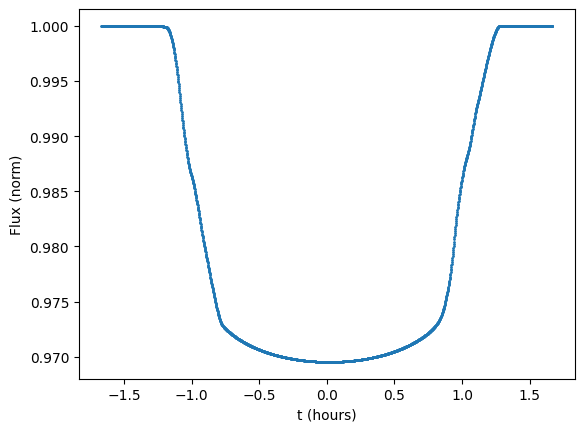

In [4]:
# velocity is for HD189733b
times, flux = photometric_observation(star_mask, exoplanet_mask,velocity=0.78, step=1)

plt.scatter(times - np.median(times), flux/flux[0], s=1)
plt.ylabel("Flux (norm)")
plt.xlabel("t (hours)")
plt.show()